In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy

In [61]:
cnames = ['TIME','Lat', 'Lon', 'Head', 'Track', 'GnSpd', 'TAS', 'GeoAl', 'Press', 'WndDr', 'wndSpd','Tempr', 'Dewpt','D Val',  'RdAlt', 'MixR', 'VtWnd', 'SfcPr', 'ThetaE']
filename = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/larry/20210905H1.1sec.txt'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
df 

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,150517,27.848,82.063,174.3,171.5,129.5,127.0,1361.0,869.5,304.5,4.2,18.30,16.1,90.3,1363.0,13.57,0.2,1016.3,343.8
1,150518,27.847,82.063,174.5,171.6,129.6,127.0,1370.0,868.7,305.0,4.2,18.25,14.8,91.6,1372.0,13.53,0.3,1016.4,343.7
2,150519,27.845,82.063,174.7,171.7,129.7,127.1,1380.0,867.3,304.6,4.2,18.14,14.9,87.8,1381.0,13.46,0.5,1015.9,343.5
3,150520,27.843,82.063,174.8,171.8,129.8,127.2,1389.0,866.8,303.5,4.3,18.03,15.5,92.2,1390.0,13.40,0.4,1016.4,343.3
4,150521,27.843,82.063,175.1,172.0,129.9,127.2,1398.0,865.6,305.2,4.3,17.92,16.0,90.3,1399.0,13.36,0.3,1016.2,343.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,182956,17.733,65.113,117.1,118.2,121.4,128.0,856.0,919.6,95.3,7.1,22.65,16.9,47.3,858.0,15.97,-0.2,1013.5,350.5
12280,182957,17.733,65.112,116.9,118.2,121.4,127.8,854.0,919.8,93.5,7.0,22.68,17.1,45.5,855.0,15.98,-0.1,1013.3,350.5
12281,182958,17.733,65.110,116.8,118.1,121.4,128.0,851.0,920.0,95.6,7.0,22.71,17.1,44.9,852.0,15.98,0.0,1013.2,350.5
12282,182959,17.732,65.110,116.8,118.1,121.4,127.8,848.0,920.6,96.6,6.8,22.75,17.1,47.5,850.0,15.98,-0.2,1013.5,350.5


In [62]:
df.mask((df <= -900), inplace=True)
df

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,150517,27.848,82.063,174.3,171.5,129.5,127.0,1361.0,869.5,304.5,4.2,18.30,16.1,90.3,1363.0,13.57,0.2,1016.3,343.8
1,150518,27.847,82.063,174.5,171.6,129.6,127.0,1370.0,868.7,305.0,4.2,18.25,14.8,91.6,1372.0,13.53,0.3,1016.4,343.7
2,150519,27.845,82.063,174.7,171.7,129.7,127.1,1380.0,867.3,304.6,4.2,18.14,14.9,87.8,1381.0,13.46,0.5,1015.9,343.5
3,150520,27.843,82.063,174.8,171.8,129.8,127.2,1389.0,866.8,303.5,4.3,18.03,15.5,92.2,1390.0,13.40,0.4,1016.4,343.3
4,150521,27.843,82.063,175.1,172.0,129.9,127.2,1398.0,865.6,305.2,4.3,17.92,16.0,90.3,1399.0,13.36,0.3,1016.2,343.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,182956,17.733,65.113,117.1,118.2,121.4,128.0,856.0,919.6,95.3,7.1,22.65,16.9,47.3,858.0,15.97,-0.2,1013.5,350.5
12280,182957,17.733,65.112,116.9,118.2,121.4,127.8,854.0,919.8,93.5,7.0,22.68,17.1,45.5,855.0,15.98,-0.1,1013.3,350.5
12281,182958,17.733,65.110,116.8,118.1,121.4,128.0,851.0,920.0,95.6,7.0,22.71,17.1,44.9,852.0,15.98,0.0,1013.2,350.5
12282,182959,17.732,65.110,116.8,118.1,121.4,127.8,848.0,920.6,96.6,6.8,22.75,17.1,47.5,850.0,15.98,-0.2,1013.5,350.5


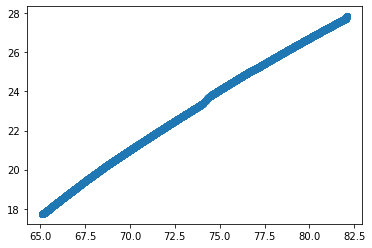

In [63]:
plt.scatter(df.Lon, df.Lat)

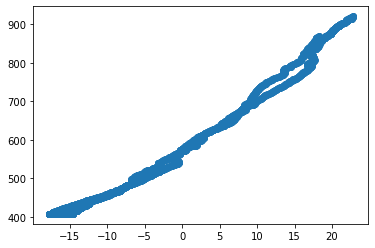

In [64]:
plt.scatter(df.Tempr, df.Press)

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units

In [66]:
#col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

#df = pd.read_fwf(get_test_data('nov11_sounding.txt', as_file_obj=False),
                 #skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all NaN values for T, Td, winds
#df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       #), how='all').reset_index(drop=True)

In [67]:
#Press = df['pressure'].values * units.hPa
#Tempr = df['temperature'].values * units.degC
#Dewpt = df['dewpoint'].values * units.degC
#wndSpd = df['speed'].values * units.knots
#WndDr = df['direction'].values * units.degrees
#u, v = mpcalc.wind_components(wndSpd, WndDr)

In [68]:
# Calculate the LCL
#lcl_pressure, lcl_temperature = mpcalc.lcl(Press[0], Tempr[0], Dewpt[0])

#print(lcl_pressure, lcl_temperature)

# Calculate the parcel profile.
#parcel_prof = mpcalc.parcel_profile(Press, Tempr[0], Dewpt[0]).to('degC')

In [69]:
# Create a new figure. The dimensions here give a good aspect ratio
#fig = plt.figure(figsize=(9, 9))
#skew = SkewT(fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
#skew.plot(Press, Tempr, 'r', linewidth=2)
#skew.plot(Press, Dewpt, 'g', linewidth=2)
#skew.plot_barbs(Press, u, v)

# Show the plot
#plt.show()

In [70]:
def plot_skewt(df):
    # We will pull the data out of the example dataset into individual variables
    # and assign units.
    p = df['pressure'].values * units.hPa
    T = df['temperature'].values * units.degC
    Td = df['dewpoint'].values * units.degC
    wind_speed = df['speed'].values * units.knots
    wind_dir = df['direction'].values * units.degrees
    u, v = mpcalc.wind_components(wind_speed, wind_dir)

    # Create a new figure. The dimensions here give a good aspect ratio.
    fig = plt.figure(figsize=(9, 9))
    add_metpy_logo(fig, 115, 100)
    skew = SkewT(fig, rotation=45)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    skew.plot(p, T, 'r')
    skew.plot(p, Td, 'g')
    skew.plot_barbs(p, u, v)
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-40, 60)

    # Calculate LCL height and plot as black dot
    lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
    skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

    # Calculate full parcel profile and add to plot as black line
    prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
    skew.plot(p, prof, 'k', linewidth=2)

    # An example of a slanted line at constant T -- in this case the 0
    # isotherm
    skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

    # Add the relevant special lines
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()

    return skew

def make_name(site, time):
    return 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/larry/20210905H1.1sec.txt'.format(site=site, dt=time)

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

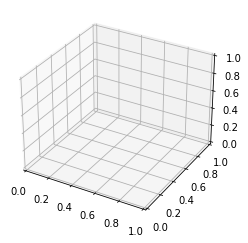

In [76]:
fig = plt.figure()
ax = plt.axes(projection='3d')

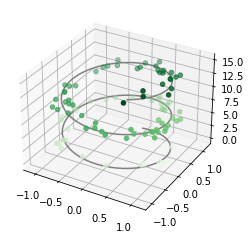

In [77]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');